In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_time_vs_samples(d, s, lda, signal_type):
    df = pd.read_csv(f'../benchmark_results/time_vs_samples_{signal_type}_{d}D_{s}MeansGrid_penalty{lda}.csv')

    df['log2_signal_length'] = np.log2(df['signal_length'])
    df['log2_exec_time'] = np.log2(df['mean_exe_time_sec'])

    upper = np.log2(df['mean_exe_time_sec'] + 2*df['std_exe_time_sec']) - df['log2_exec_time']
    lower = df['log2_exec_time'] - np.log2(df['mean_exe_time_sec'] - 2*df['std_exe_time_sec'])
    yerr = np.vstack([lower, upper])

    plt.figure(figsize=(6, 6))
    plt.errorbar(df['log2_signal_length'], df['log2_exec_time'], yerr=yerr,
                 fmt='o-', capsize=4, markersize=4, label='mean ± 2σ (log2)')
    plt.xlabel('n samples')
    plt.ylabel('exe time (s)')

    xt = np.arange(np.floor(df['log2_signal_length'].min()), np.ceil(df['log2_signal_length'].max()) + 1, 1)
    yt = np.arange(np.floor((df['log2_exec_time'] - lower).min()), np.ceil((df['log2_exec_time'] + upper).max()) + 1, 1)
    plt.xticks(xt, [f'$2^{{{int(t)}}}$' for t in xt])
    plt.yticks(yt, [f'$2^{{{int(t)}}}$' for t in yt])

    plt.title(f'{signal_type} {d}D signals --- Size of Theta: {s**d}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [3]:
def plot_time_vs_samples_slope(d, s, lda, signal_type):
    df = pd.read_csv(f'../benchmark_results/time_vs_samples_{signal_type}_{d}D_{s}MeansGrid_penalty{lda}.csv')

    df['log2_signal_length'] = np.log2(df['signal_length'])
    df['log2_exec_time'] = np.log2(df['mean_exe_time_sec'])

    # Sort by signal length to ensure monotonic x-axis
    df = df.sort_values('log2_signal_length')

    # Compute the numerical derivative (slope)
    x = df['log2_signal_length'].values
    y = df['log2_exec_time'].values
    slopes = np.gradient(y, x)

    # Use midpoints for x-axis when plotting derivative between points
    mid_x = (x[:-1] + x[1:]) / 2 if len(x) > 1 else x

    plt.figure(figsize=(6, 2))
    plt.plot(mid_x, slopes[1:], 'o-', label='slope log2(time) vs log2(samples)')

    plt.xlabel('n samples (log2 scale)')
    plt.ylabel('slope')
    plt.title(f'Slope — {signal_type} {d}D signals — Size of Theta: {s**d}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

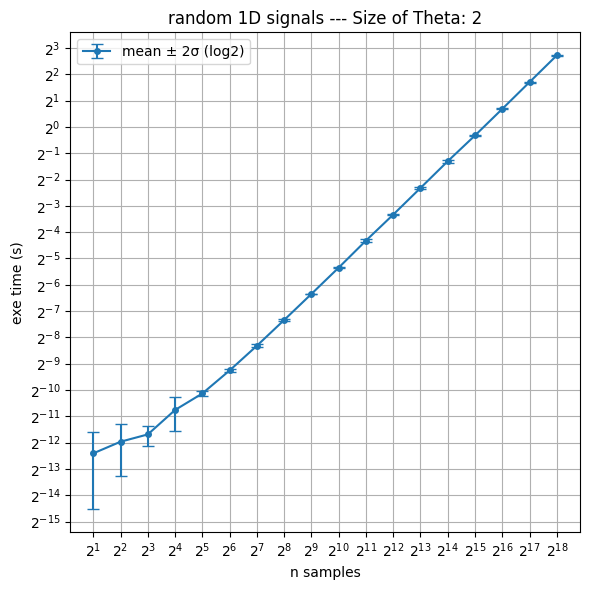

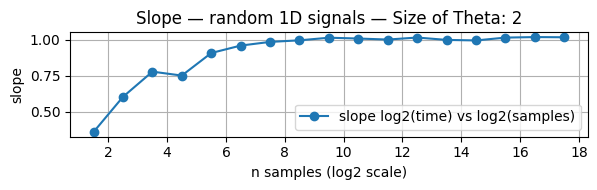

In [4]:
signal_type = 'random'          # either random or const_changes or linear_changes
d = 1                           # Dimensionality
s = 2                           # Number of discrete value for each dimension
lda = 1                         # penalty
plot_time_vs_samples(d, s, lda, signal_type)
plot_time_vs_samples_slope(d, s, lda, signal_type)

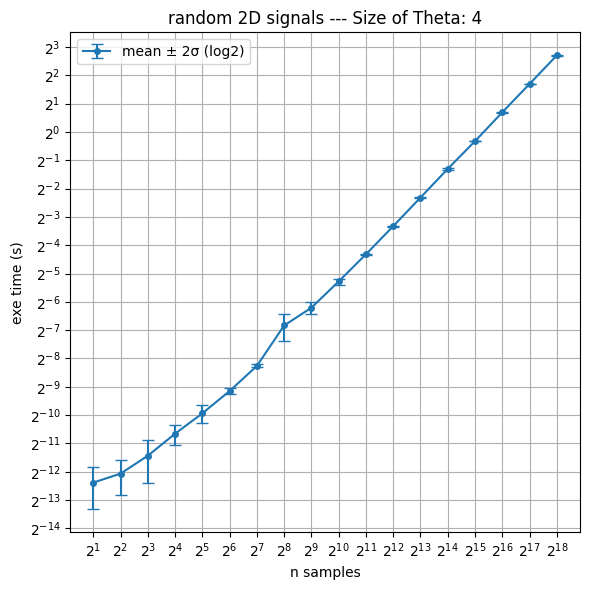

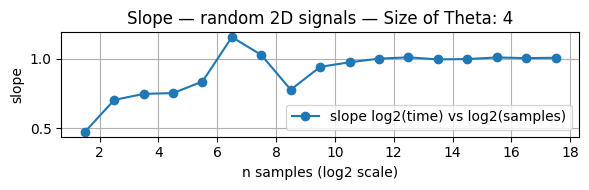

In [5]:
signal_type = 'random'          # either random or const_changes or linear_changes
d = 2                           # Dimensionality
s = 2                           # Number of discrete value for each dimension
lda = 1                         # penalty
plot_time_vs_samples(d, s, lda, signal_type)
plot_time_vs_samples_slope(d, s, lda, signal_type)

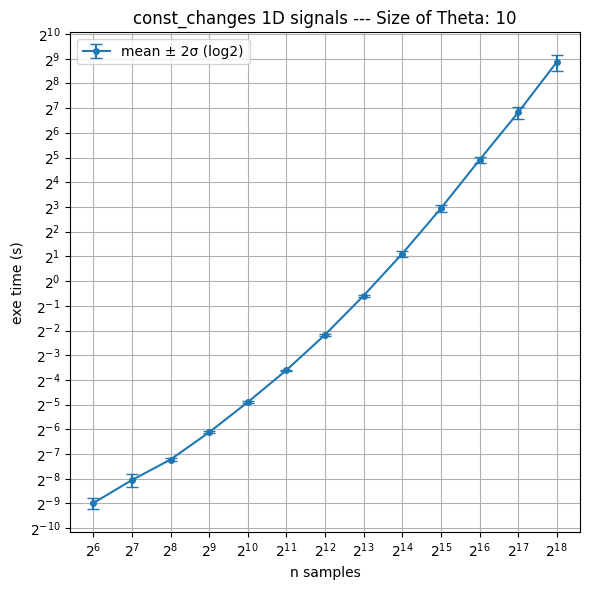

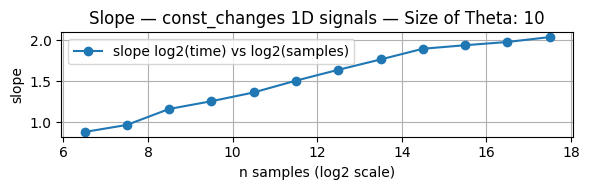

In [6]:
signal_type = 'const_changes'   # either random or const_changes or linear_changes
d = 1                           # Dimensionality
s = 10                          # Number of discrete value for each dimension
lda = 10                        # penalty
plot_time_vs_samples(d, s, lda, signal_type)
plot_time_vs_samples_slope(d, s, lda, signal_type)

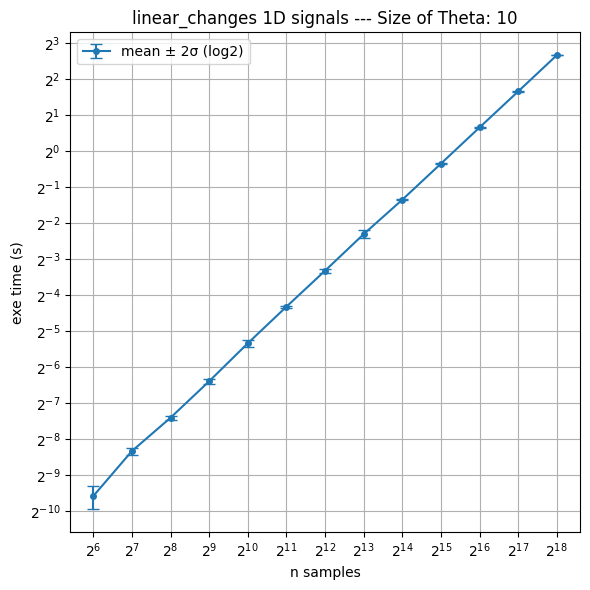

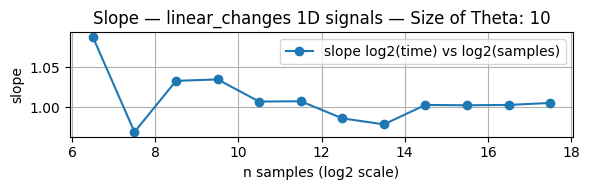

In [7]:
signal_type = 'linear_changes'  # either random or const_changes or linear_changes
d = 1                           # Dimensionality
s = 10                          # Number of discrete value for each dimension
lda = 10                        # penalty
plot_time_vs_samples(d, s, lda, signal_type)
plot_time_vs_samples_slope(d, s, lda, signal_type)